# Algorithme de cryptographie
Nous utilisons tous la cryptographie sans forcément le savoir, chaque fois que nous envoyons un message, que nous faisons un achat en ligne, ou que nous nous connectons à un site sécurisé en « https ».  

La cryptographie repose sur des algorithmes mathématiques qui permettent de transformer un message clair en un message chiffré, illisible sans une clé appropriée. Il y a deux grand type de chiffrement en cryptographie : le chiffrement symétrique, où la même clé est utilisée pour chiffrer et déchiffrer un message et le chiffrement asymétrique, qui repose sur une paire de clés publique et privée.  

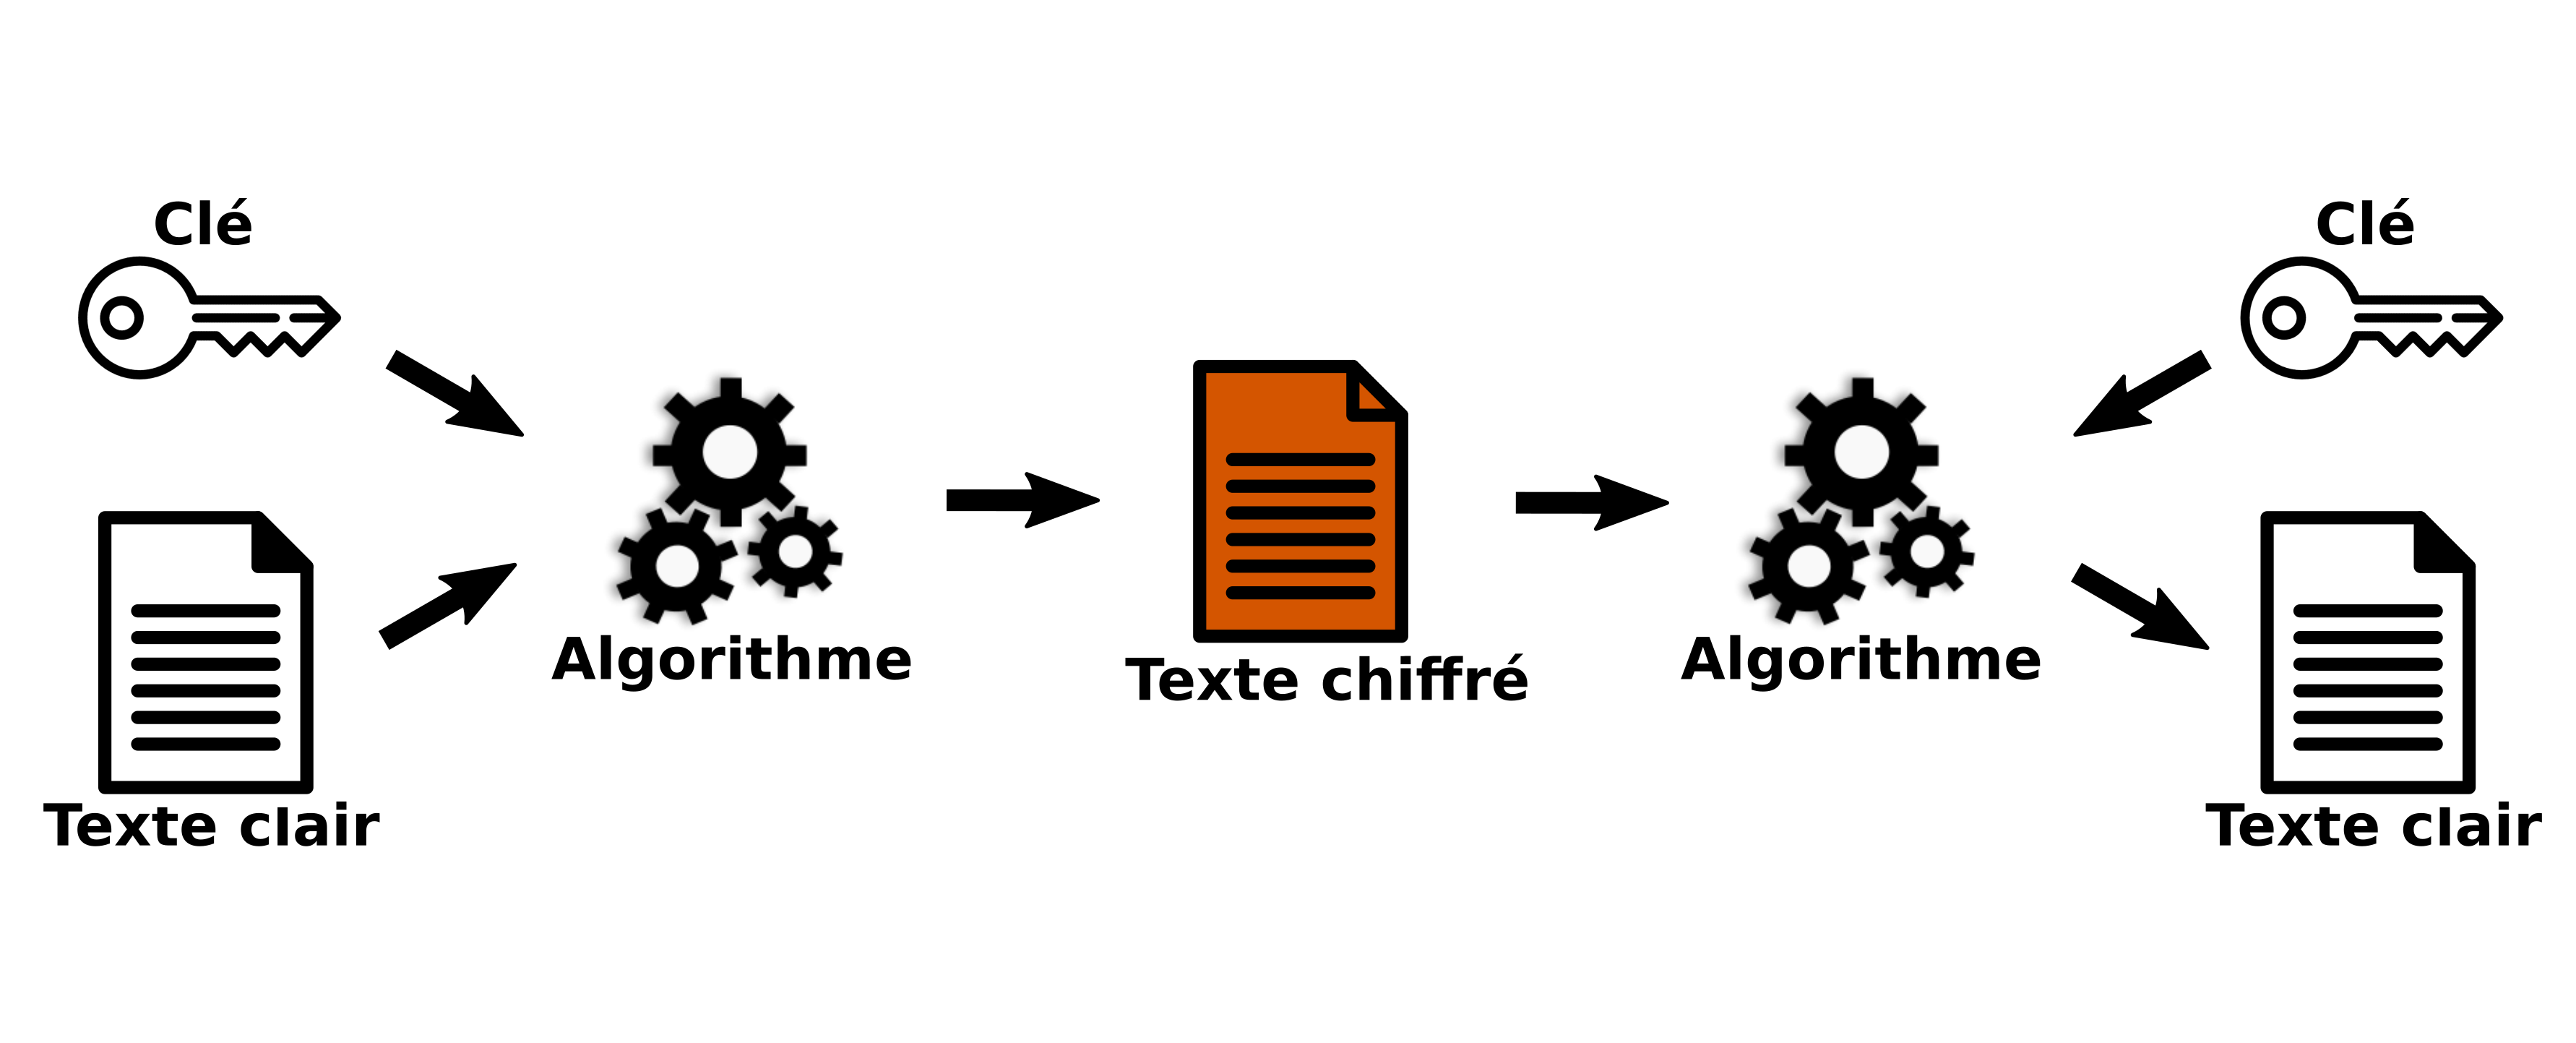

### Chifrement symétrique
Prenons deux machines qu'on nommera A et B qui voudrait communiquer entre elles de facon sécurisé:  

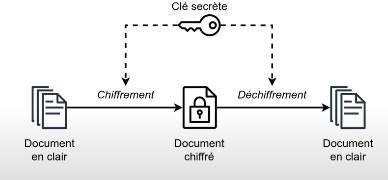

La machine A va utiliser une clé de chiffrement pour chiffrer le message et la machine B elle, va utiliser une clé de déchiffrement pour déchiffrer et comprendre le message que la machine A lui a envoyé.  

Dans un chiffrement symétrique, c'est la même clé qui va servir au chiffrement et au déchiffrement. La clé peut etre:
- un nombre avec un simple décalage des lettres de l'alphabet, comme le chiffre de César !  

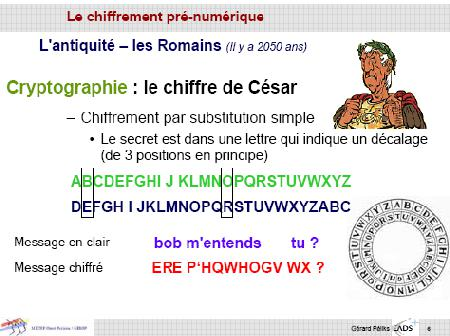

- une phrase (dans la méthode du masque jetable)

- une image (ou on utiliserait un chiffrement avec XOR avec les pixels d'une image)



#### Chiffrage grace au masque jetable

In [ ]:
masque = 'LECRYPTAGE' # on definit le masque (clé)

def chiffre(message, masque):
    message_chiffre = ''
    for i in range(len(message)):
        lettre_chiffree = chr(ord(message[i]) ^ ord(masque[i])) #  le XOR '^' mélange les lettres du msg avec celle du masque et les transforme en ASCII
        message_chiffre += lettre_chiffree # on ajoute les caractères chiffré à la chaine finale
    return message_chiffre

In [ ]:
chiffre('LANSICBIEN', masque)

'\x00\x04\r\x01\x10\x13\x16\x08\x02\x0b'

### Avantage du chiffrement symétrique

Le chiffrement symétriques est la plupart du temps rapides, consommant peu de ressources et est donc adaptés a un chiffrement d'information importants.  
La sécurisation des données transitant par le protocole https est basée sur un chiffrement symétrique.  

### Inconvénient d'un chiffrement symétrique  

Le chiffrement symétrique utilise une même clé pour chiffrer et déchifrer un msg, ce qui pose un risque de sécurité si la clé est interceptée par un tiers. Il est donc difficile de le gérer à grande échelle, car chaque paire d'utilisateurs a besoin d'une clé différente. De plus, il ne permet pas de vérifier l'identité de l'expéditeur du message.

### Chiffrement asymetrique
Inventé par Whitfield Diffie et Martin Hellman en 1976, le chiffrement asymetrique vient resoudre le probleme principal du chiffrement symetrique: le necessaire partage d'un secret (la clé) avant l'établissement de la communication sécurisée.

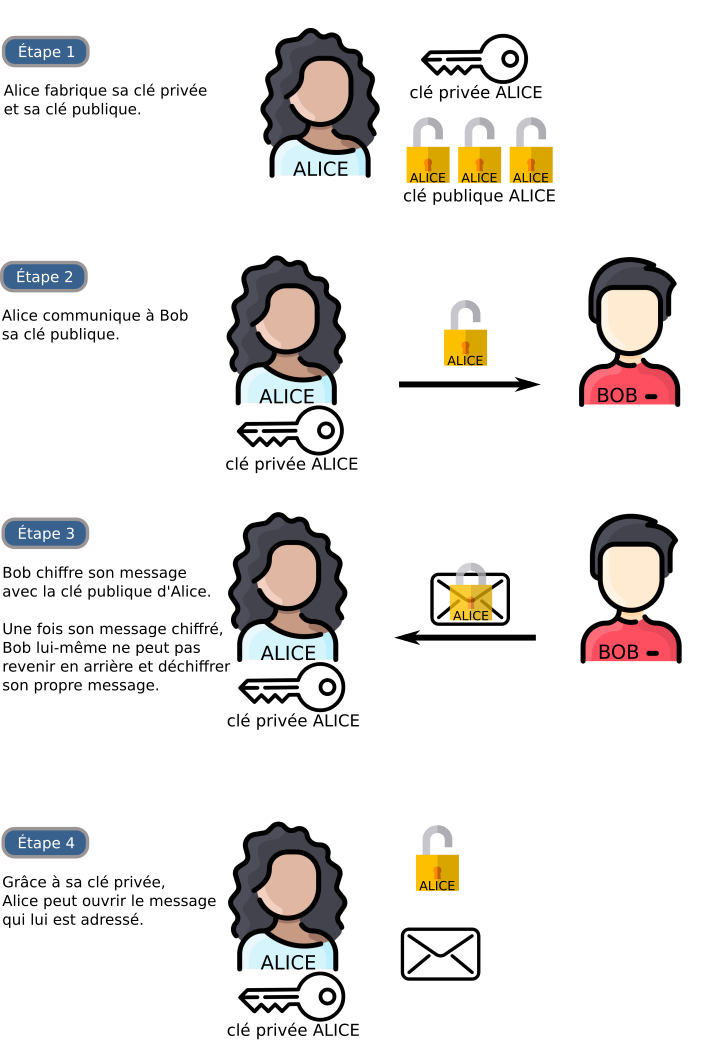  


Le chiffrement asymétrique est aussi appellé cryptographie a clé publique, repose sur deux clés distinctes:  
    - Une clé publique qui est diffusée au grand public  
    - Une clé privée qui sera gardé secrète par le destinataire  
Ce systeme permet donc de chiffrer un message avec la clé publique de telle sorte qu'il ne peut pas être déchiffré sans etre en connaissance de la clé privée qui lui est unique.  

Si nous prenons en exemple le protocole HTTPS, le protocole asymetrique RSA est utilisé pour sécuriser la connexion associé a un protocole TLS.  

### Desavantage de ce chiffrement:  
- Il est moins rapide que le chiffrement symétrique car il neccesite des echanges entre l'envoyeur et le destinataire ainsi que des calculs plus complexe.  

#### Generation d'une clé RSA avec une clé publique et une clé privée

In [ ]:
# On utlise cryptography pour creer la clé rsa
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

# Générer une clé privée RSA
private_key = rsa.generate_private_key(
    public_exponent=65537,
    key_size=2048
)

# Exporter la clé privée au format PEM
private_pem = private_key.private_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PrivateFormat.TraditionalOpenSSL,
    encryption_algorithm=serialization.NoEncryption()
)

# Générer la clé publique correspondante
public_key = private_key.public_key()

# Exporter la clé publique au format PEM
public_pem = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
)

# Sauvegarder les clés dans des fichiers
with open("private_key.pem", "wb") as private_file:
    private_file.write(private_pem)

with open("public_key.pem", "wb") as public_file:
    public_file.write(public_pem)

print("Clés RSA générées et sauvegardées dans 'private_key.pem' et 'public_key.pem'.")

Clés RSA générées et sauvegardées dans 'private_key.pem' et 'public_key.pem'.


### Protocole HTTPS  
90% des sites sont maintenant sécrurisé avec le protocole HTTPS pour naviguer sur internet de maniere confidentielle et authentifié.  

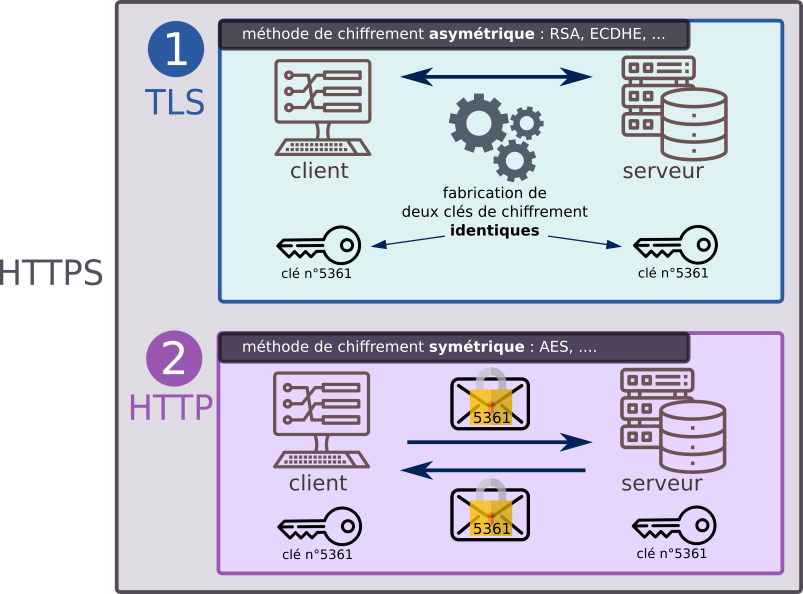  




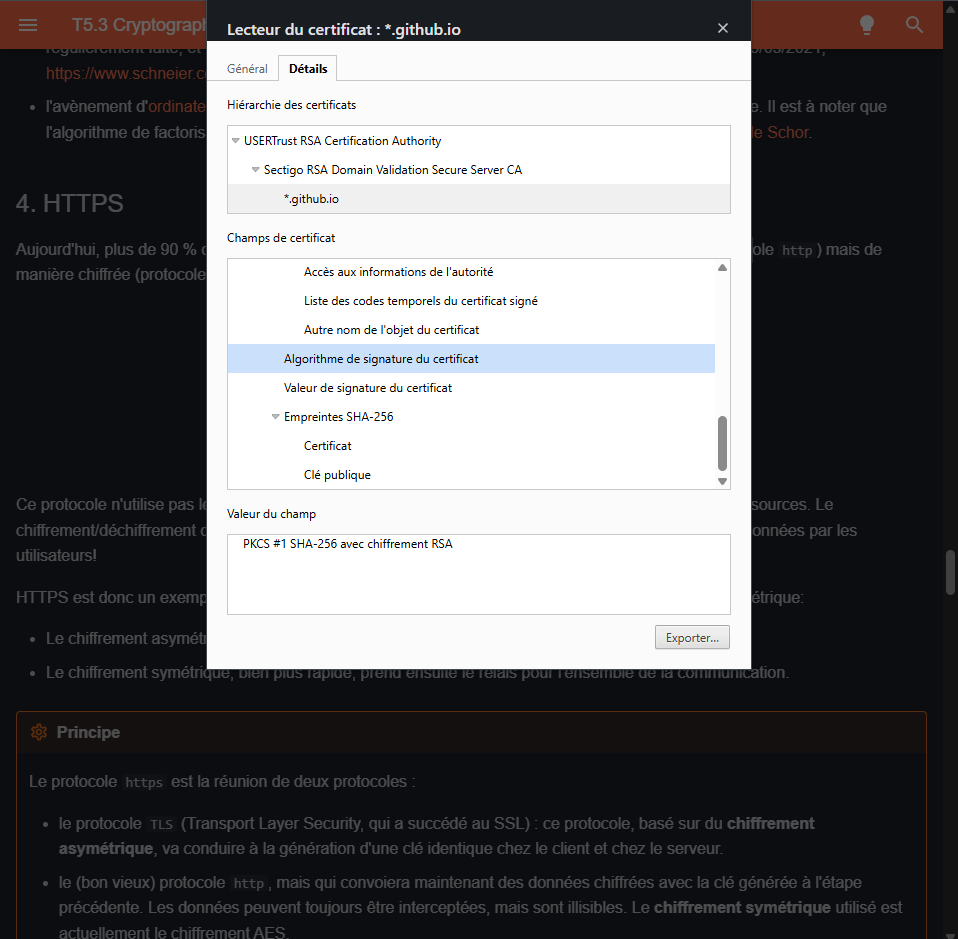

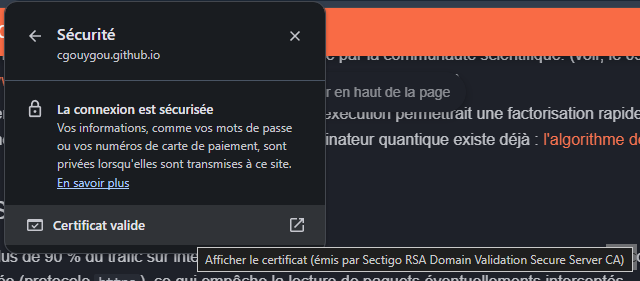